In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.metrics import log_loss, auc, roc_auc_score, roc_curve, average_precision_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import mean_squared_error
from sklearn import svm

import random

import missingno
import sklearn

import xgboost as xgb
from xgboost import plot_tree

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# File located in google drive
url =  "https://drive.google.com/uc?export=download&id=1p5qOHBkiRing9gEd341mz9LVvEGtlbpL"

file = requests.get(url).content
df = pd.read_csv(io.StringIO(file.decode('utf-8')))

df = df.sample(frac=0.3, random_state = 117, axis = 0)


In [2]:
X = df.drop(['enrollee_id','target', 'city', 'city_development_index'], axis = 1)
Y = df['target']

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5747 entries, 12617 to 8003
Data columns (total 10 columns):
gender                 5747 non-null int64
enrolled_university    5747 non-null int64
education_level        5747 non-null int64
major_discipline       5747 non-null int64
experience             5747 non-null int64
company_size           5747 non-null int64
company_type           5747 non-null int64
last_new_job           5747 non-null int64
relevent_experience    5747 non-null int64
training_hours         5747 non-null int64
dtypes: int64(10)
memory usage: 493.9 KB


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


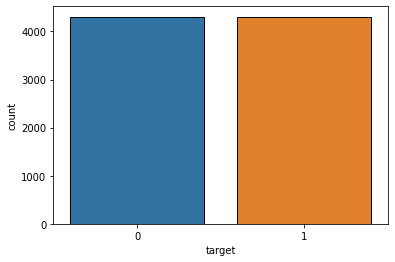

In [4]:
smote = SMOTE(random_state = 402)
X, Y = smote.fit_resample(X,Y)

sns.countplot(Y, edgecolor = 'black')

In [5]:
X = pd.DataFrame(X)

In [6]:
X.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,relevent_experience,training_hours
0,1,0,2,0,4,6,0,2,1,19
1,2,1,1,0,2,3,3,1,0,5
2,1,0,0,0,2,2,0,2,0,46
3,1,0,3,0,21,5,3,5,1,13
4,1,0,2,0,3,1,0,5,1,18


In [7]:
# Separate the data in Train & Test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42, shuffle = True, test_size = 0.2)
X_train.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,relevent_experience,training_hours
2609,1,0,2,0,6,4,0,5,1,70
6689,1,0,0,0,21,2,0,4,1,19
2676,1,0,3,0,15,4,0,5,1,64
6526,1,0,2,0,7,2,0,1,1,72
247,1,0,2,0,7,5,0,1,1,316


In [8]:
columns = X.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = columns)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns)
X_test.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,relevent_experience,training_hours
0,-0.121446,-0.528759,1.474628,-0.297282,-0.303617,-0.084171,-0.509592,-1.148566,0.76587,-0.754585
1,-0.121446,-0.528759,-0.041353,-0.297282,-1.226250,-0.688450,-0.509592,-1.148566,0.76587,3.619664
2,-0.121446,-0.528759,-1.557334,0.813818,0.772787,-0.084171,-0.509592,2.065106,0.76587,2.472048
3,-0.121446,-0.528759,-0.041353,-0.297282,0.003927,-1.897008,-0.509592,1.422371,0.76587,1.257902
4,-0.121446,-0.528759,1.474628,-0.297282,0.003927,-0.688450,-0.509592,-0.505831,0.76587,-0.305518


In [9]:
Y_train.value_counts(normalize=True)

0    0.501524
1    0.498476
Name: target, dtype: float64

In [10]:
Y_test.value_counts(normalize=True)

1    0.506094
0    0.493906
Name: target, dtype: float64

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
   # fit_times_mean = np.mean(fit_times, axis=1)
   # fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
   # axes[1].grid()
   # axes[1].plot(train_sizes, fit_times_mean, 'o-')
   # axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
   #                      fit_times_mean + fit_times_std, alpha=0.1)
   # axes[1].set_xlabel("Training examples")
   # axes[1].set_ylabel("fit_times")
   # axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    #axes[2].grid()
    #axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    #axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
   #                      test_scores_mean + test_scores_std, alpha=0.1)
   # axes[2].set_xlabel("fit_times")
   # axes[2].set_ylabel("Score")
   # axes[2].set_title("Performance of the model")

    return plt

# ----------------- End of Data Prep ----------------- 

In [12]:
%%time
clf = svm.SVC(random_state=42,kernel='linear',gamma='auto', C = 1, probability = True)
clf.fit(X_train, Y_train)

CPU times: user 17 s, sys: 441 ms, total: 17.5 s
Wall time: 17.5 s


SVC(C=1, gamma='auto', kernel='linear', probability=True, random_state=42)

In [13]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 687 ms, sys: 0 ns, total: 687 ms
Wall time: 686 ms


In [14]:
%%time
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.693226260512696
Test AUC Score 0.6982381763494647
 
Acuracy  0.6210098665118978
ROC_AUC  0.6982381763494647
PR  0.6944050540453559
 
[[642 209]
 [444 428]]
              precision    recall  f1-score   support

           0       0.59      0.75      0.66       851
           1       0.67      0.49      0.57       872

    accuracy                           0.62      1723
   macro avg       0.63      0.62      0.62      1723
weighted avg       0.63      0.62      0.61      1723

CPU times: user 2.41 s, sys: 3.74 ms, total: 2.42 s
Wall time: 2.42 s


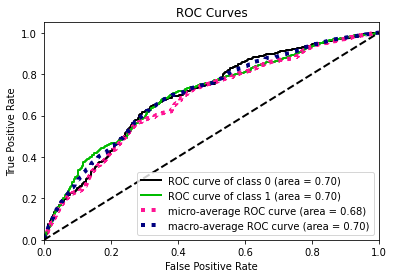

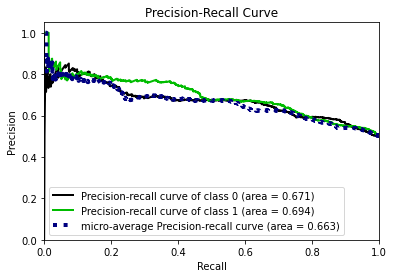

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

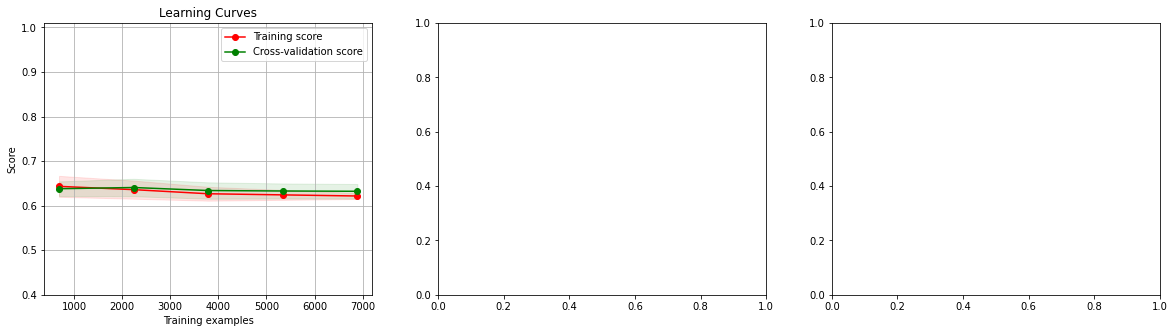

In [15]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [16]:
clf.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [17]:
%%time
parameter_space = {
    'C': [ 5, 10, 15]
    #,'gamma': [10, 1, 0.1, 0.01]
    ,'kernel' : ['linear']
}

eval_set = [(X_test, Y_test)]
GridSearch = GridSearchCV(svm.SVC(), param_grid = parameter_space, n_jobs=-1, cv=3)

GridSearch.fit(X_train, Y_train)

CPU times: user 5.38 s, sys: 108 ms, total: 5.48 s
Wall time: 15.6 s


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [5, 10, 15], 'kernel': ['linear']})

In [18]:
GridSearch.best_params_

{'C': 5, 'kernel': 'linear'}

In [19]:
%%time
clf = svm.SVC(random_state=42,kernel='linear', C = 5, probability = True)
clf.fit(X_train, Y_train)

CPU times: user 26.6 s, sys: 427 ms, total: 27 s
Wall time: 27 s


SVC(C=5, kernel='linear', probability=True, random_state=42)

In [20]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 706 ms, sys: 0 ns, total: 706 ms
Wall time: 701 ms


In [21]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.692537122958111
Test AUC Score 0.6984106663504349
 
Acuracy  0.6210098665118978
ROC_AUC  0.6984106663504349
PR  0.6977057190619936
 
[[642 209]
 [444 428]]
              precision    recall  f1-score   support

           0       0.59      0.75      0.66       851
           1       0.67      0.49      0.57       872

    accuracy                           0.62      1723
   macro avg       0.63      0.62      0.62      1723
weighted avg       0.63      0.62      0.61      1723



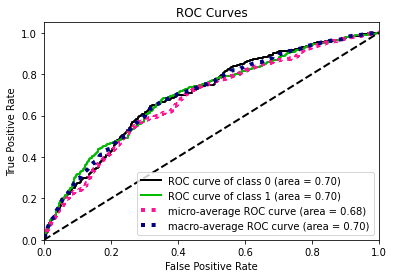

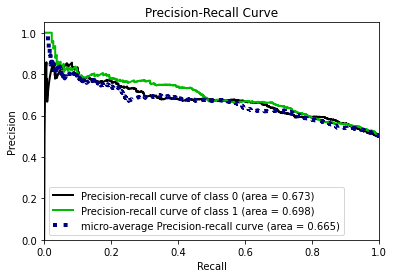

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

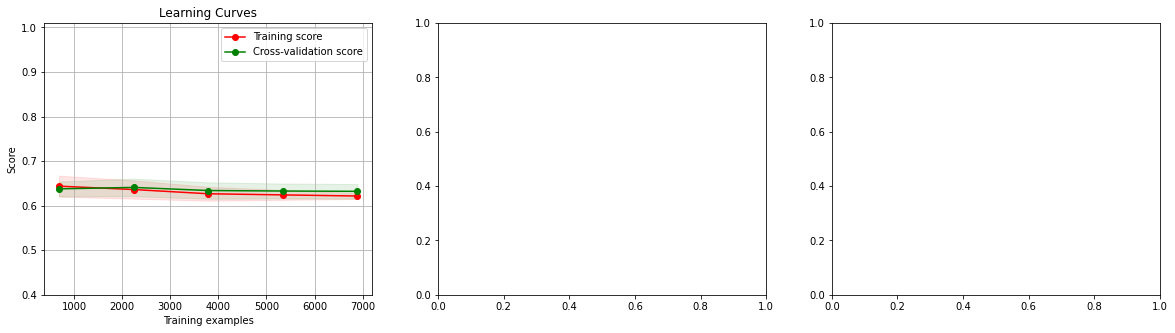

In [22]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [23]:
%%time
clf = svm.SVC(random_state=42,kernel='linear', C = 10, probability = True)
clf.fit(X_train, Y_train)

CPU times: user 34.8 s, sys: 486 ms, total: 35.3 s
Wall time: 35.3 s


SVC(C=10, kernel='linear', probability=True, random_state=42)

In [24]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 709 ms, sys: 0 ns, total: 709 ms
Wall time: 708 ms


In [25]:
%%time
clf = svm.SVC(random_state=42,kernel='rbf',gamma='scale', degree = 3, probability = True)
clf.fit(X_train, Y_train)

CPU times: user 19.9 s, sys: 380 ms, total: 20.3 s
Wall time: 20.3 s


SVC(probability=True, random_state=42)

In [26]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 1.95 s, sys: 0 ns, total: 1.95 s
Wall time: 1.94 s


In [27]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.7937583815165239
Test AUC Score 0.7546720533856555
 
Acuracy  0.690075449796866
ROC_AUC  0.7546720533856555
PR  0.7462456202308614
 
[[599 252]
 [282 590]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       851
           1       0.70      0.68      0.69       872

    accuracy                           0.69      1723
   macro avg       0.69      0.69      0.69      1723
weighted avg       0.69      0.69      0.69      1723



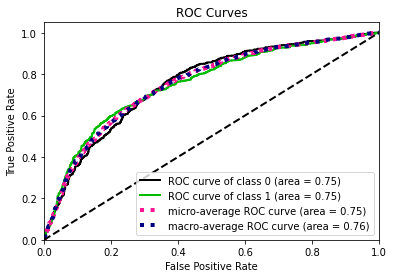

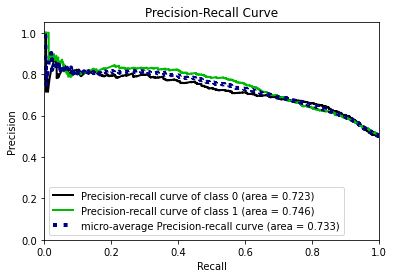

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

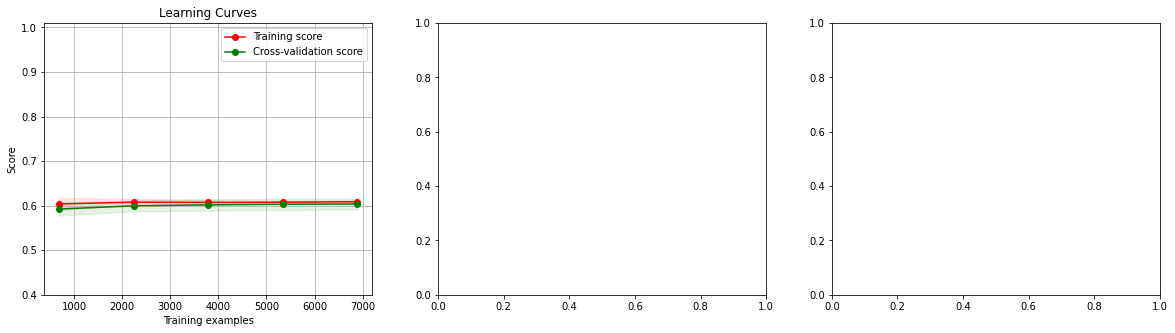

In [28]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=-1)

In [43]:
%%time
clf = svm.SVC(random_state=42,kernel='linear', C = 30, probability = True)
clf.fit(X_train, Y_train)

CPU times: user 5min 10s, sys: 553 ms, total: 5min 10s
Wall time: 5min 10s


SVC(C=30, kernel='linear', probability=True, random_state=42)

In [44]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 694 ms, sys: 12 µs, total: 694 ms
Wall time: 693 ms


In [45]:
%%time
clf = svm.SVC(random_state=42,kernel='rbf',gamma='scale', degree = 3, probability = True)
clf.fit(X_train, Y_train)

CPU times: user 19.6 s, sys: 380 ms, total: 20 s
Wall time: 20 s


SVC(probability=True, random_state=42)

In [46]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 2.05 s, sys: 0 ns, total: 2.05 s
Wall time: 2.05 s


In [47]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.7937583815165239
Test AUC Score 0.7546720533856555
 
Acuracy  0.690075449796866
ROC_AUC  0.7546720533856555
PR  0.7462456202308614
 
[[599 252]
 [282 590]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       851
           1       0.70      0.68      0.69       872

    accuracy                           0.69      1723
   macro avg       0.69      0.69      0.69      1723
weighted avg       0.69      0.69      0.69      1723



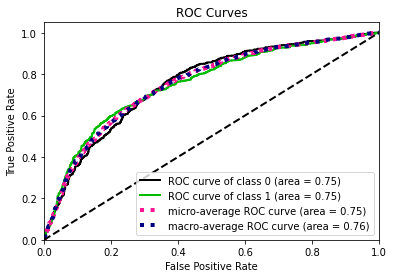

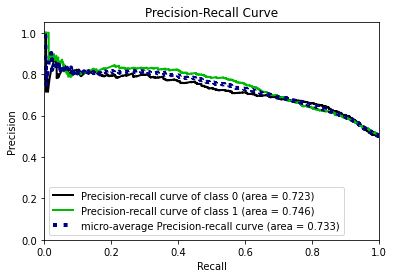

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

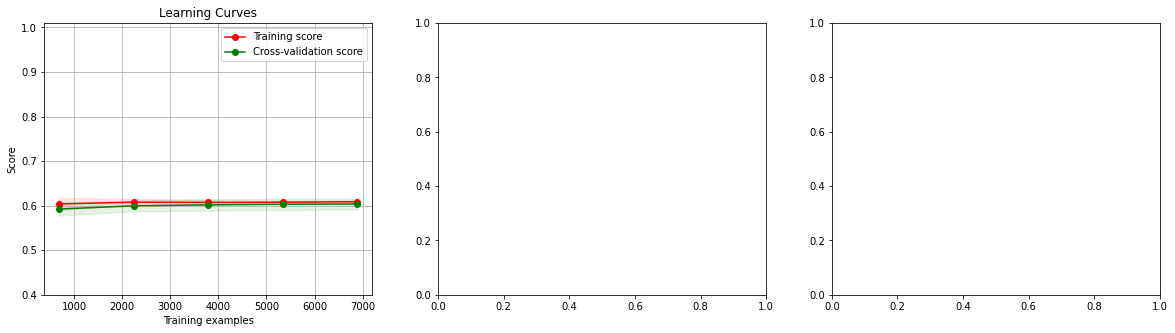

In [48]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=-1)

In [29]:
%%time
clf = svm.SVC(random_state=42,kernel='rbf',gamma='scale', degree = 5, C = 5, probability = True)
clf.fit(X_train, Y_train)

CPU times: user 21.3 s, sys: 476 ms, total: 21.8 s
Wall time: 21.8 s


SVC(C=5, degree=5, probability=True, random_state=42)

In [30]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 1.89 s, sys: 0 ns, total: 1.89 s
Wall time: 1.89 s


In [31]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8264114642298775
Test AUC Score 0.7617225821753145
 
Acuracy  0.7034242600116076
ROC_AUC  0.7617225821753145
PR  0.7506934373060735
 
[[588 263]
 [248 624]]
              precision    recall  f1-score   support

           0       0.70      0.69      0.70       851
           1       0.70      0.72      0.71       872

    accuracy                           0.70      1723
   macro avg       0.70      0.70      0.70      1723
weighted avg       0.70      0.70      0.70      1723



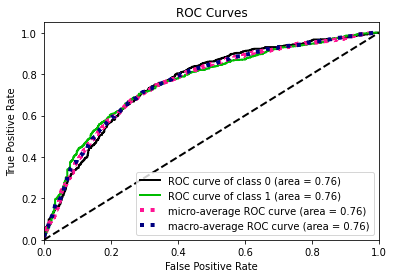

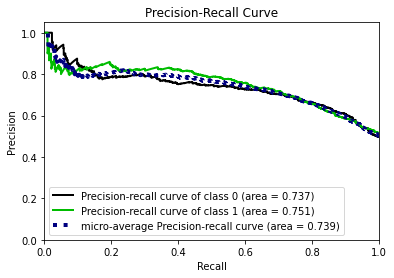

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

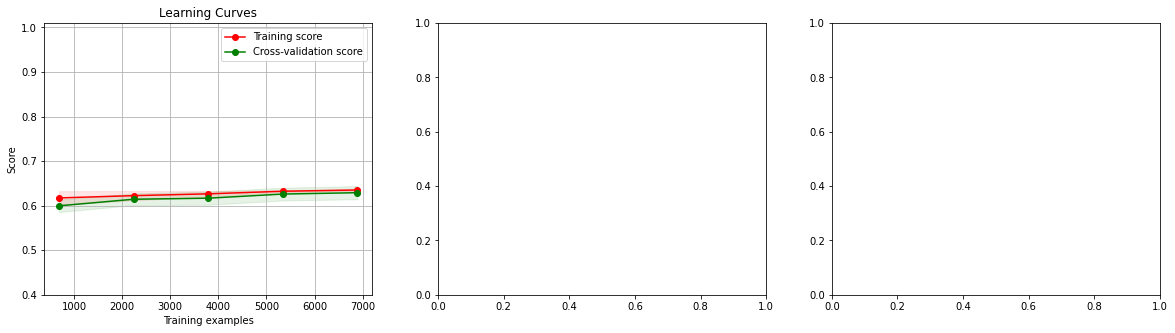

In [32]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=-1)

In [33]:
%%time
clf = svm.SVC(random_state=42,kernel='rbf',gamma='scale', degree = 10, C = 6, probability = True)
clf.fit(X_train, Y_train)

CPU times: user 21.2 s, sys: 400 ms, total: 21.6 s
Wall time: 21.6 s


SVC(C=6, degree=10, probability=True, random_state=42)

In [34]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 1.88 s, sys: 0 ns, total: 1.88 s
Wall time: 1.88 s


In [35]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8302802711736481
Test AUC Score 0.7628417458144223
 
Acuracy  0.706326175275682
ROC_AUC  0.7628417458144223
PR  0.7507279210125699
 
[[589 262]
 [244 628]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       851
           1       0.71      0.72      0.71       872

    accuracy                           0.71      1723
   macro avg       0.71      0.71      0.71      1723
weighted avg       0.71      0.71      0.71      1723



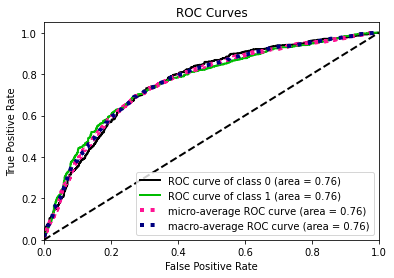

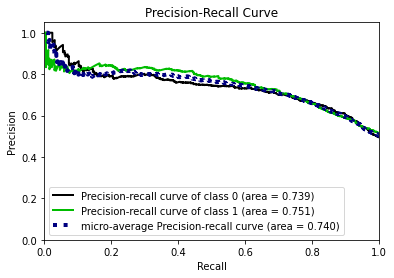

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

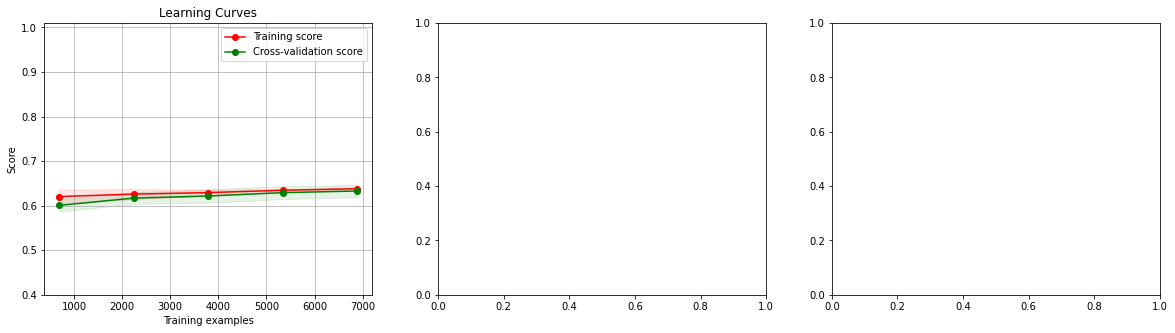

In [36]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=-1)

In [37]:
clf.get_params()

{'C': 6,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 10,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [58]:
%%time
clf = svm.SVC(random_state=42,kernel='rbf',gamma='scale', degree = 5, C = 15, probability = True)
clf.fit(X_train, Y_train)

CPU times: user 23.5 s, sys: 428 ms, total: 23.9 s
Wall time: 23.9 s


SVC(C=15, degree=5, probability=True, random_state=42)

In [59]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 1.83 s, sys: 3.92 ms, total: 1.84 s
Wall time: 1.83 s


In [60]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8499111727721171
Test AUC Score 0.767424185254261
 
Acuracy  0.7086477074869414
ROC_AUC  0.767424185254261
PR  0.7478001039278461
 
[[577 274]
 [228 644]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       851
           1       0.70      0.74      0.72       872

    accuracy                           0.71      1723
   macro avg       0.71      0.71      0.71      1723
weighted avg       0.71      0.71      0.71      1723



In [61]:
%%time
clf = svm.SVC(random_state=42,kernel='rbf',gamma='auto', degree = 5, C = 15, probability = True)
clf.fit(X_train, Y_train)

CPU times: user 23.9 s, sys: 448 ms, total: 24.3 s
Wall time: 24.3 s


SVC(C=15, degree=5, gamma='auto', probability=True, random_state=42)

In [62]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 1.85 s, sys: 0 ns, total: 1.85 s
Wall time: 1.85 s


In [63]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8499111727721171
Test AUC Score 0.767424185254261
 
Acuracy  0.7086477074869414
ROC_AUC  0.767424185254261
PR  0.7478001039278461
 
[[577 274]
 [228 644]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       851
           1       0.70      0.74      0.72       872

    accuracy                           0.71      1723
   macro avg       0.71      0.71      0.71      1723
weighted avg       0.71      0.71      0.71      1723

